In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
λList = np.hstack((np.arange(1,10,1), np.arange(10,105,5)))

In [3]:
def sigm(x):
    return 1/(1+np.exp(-x))

def find_g_H(xMatx, yMatx, ω, λ):
    D = len(xMatx[0])
    xMatx = np.insert(xMatx, 0, 1, axis = 1)
    
    µList = sigm(np.dot(xMatx, ω))
    sDiag = []    
    for µ in µList:
        sDiag.append(µ * (1 - µ))
    S = np.diag(sDiag)
        
    I = np.ones(D)
    I = np.insert(I, 0, 0)
    I = np.diag(I)
    
    λI = np.dot(λ, I)
    λω = np.insert(λ * ω[1:], 0, 0)    

    gReg = np.dot(xMatx.T, (µList - yMatx))
    HReg = np.dot(xMatx.T, np.dot(S, xMatx))    
    gReg = gReg + λω
    HReg = HReg + λI
    
    return gReg, HReg

def findOmega(xMatx, yMatx, λ):
    D = len(xMatx[0])
    ω = np.zeros(D + 1)
    endLoop = False
    
    while endLoop == False:
        gReg, HReg = find_g_H(xMatx, yMatx, ω, λ)
        ω_next = ω - np.dot(np.linalg.inv(HReg), gReg)
        if (np.allclose(ω_next,ω,0.0001,0.0001)):
            endLoop = True
        else:
            ω = ω_next
    return ω_next
        

def logesticRegression(xMatx, yMatx, xTrain, yTrain, lam):
    omega = findOmega(xTrain, yTrain, lam)
    error_count = 0

    result = (sigm(omega[0] + np.dot(xMatx, omega[1:])) > 0.5) + 0
    return ((np.sum(result != yMatx)) / len(yMatx)) * 100

In [4]:
mat = loadmat('spamData.mat')

xTestOrig = mat['Xtest']  
xTrainOrig = mat['Xtrain']
yTestOrig = mat['ytest']  
yTrainOrig = mat['ytrain']

xtestLog = np.log(xTestOrig + 0.1)
xtrainLog = np.log(xTrainOrig + 0.1)

ytrainFlat = yTrainOrig.flatten()
ytestFlat = yTestOrig.flatten()

trainingError = []
testError = []

for λ in λList:
    trainingError.append(logesticRegression(xtrainLog, ytrainFlat, xtrainLog, ytrainFlat, λ))
    testError.append(logesticRegression(xtestLog, ytestFlat, xtrainLog, ytrainFlat, λ))

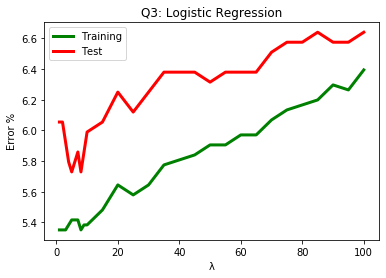

In [5]:
plt.plot(λList,trainingError,'g',label='Training', linewidth=3)
plt.plot(λList,testError,'r',label='Test', linewidth=3)
plt.title('Q3: Logistic Regression')
plt.ylabel('Error %')
plt.xlabel('λ')
plt.legend()
plt.show()